In [1]:
import torch
import math
import numpy as np
import torch as nn

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
class Feedforward(torch.nn.Module):
        def __init__(self, input_size, hidden_size):
            super(Feedforward, self).__init__()
            self.input_size = input_size
            self.hidden_size  = hidden_size
            self.fc1 = torch.nn.GaussianNLLLoss()
            self.relu = torch.nn.ReLU()
            self.fc2 = torch.nn.GaussianNLLLoss()
            self.relu2 = torch.nn.ReLU()
            self.fc3 = torch.nn.GaussianNLLLoss()
            self.relu3 = torch.nn.ReLU()
            self.sigmoid = torch.nn.Sigmoid()
            
        def forward(self, x):
            hidden = self.fc1(x)
            relu = self.relu(hidden)
            output = self.fc2(relu)
            output = self.sigmoid(output)
            return output

In [3]:
# Training data is 1000 points in [0,1] inclusive regularly spaced
X = torch.linspace(0, 1, 1000)
Nhf=100

def hf(x): 
    return 1.8*torch.sin(x * (8 * math.pi))*2*x # + torch.randn(x.size()) * math.sqrt(0.04) #* the accurately simulated sin model for HF data

X_hf = np.random.permutation(X)[0:Nhf]

# Converting np.ndarray to tensor to be able to utilize GPyTorch
X_hf = torch.from_numpy(X_hf) 

train, test = train_test_split(X_hf, test_size = 0.25)
print(train.shape)
print(test.shape)

torch.Size([75])
torch.Size([25])


In [4]:
# Model, Criterion, Optimizer - Initializes the model that is going to be used by nn.Module and ScriptModule
# NeuralNetworkorFeedforward(x,y) x= input dimension y= hidden dimensions
model = Feedforward(1, 10)
criterion = torch.nn.BCELoss(size_average=True)
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01) 

c:\Users\emjan\AppData\Local\VisualStudioCode\Dissertation_Venv\dis_env\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


ValueError: optimizer got an empty parameter list

In [ ]:
# Loss Function before training
model.eval() # stops model from learning new weights while checking for the loss - this is not a common part of the code
y_pred = model(train)
before_train = criterion(y_pred.squeeze(), test)
print('Test loss before training' , before_train.item())

TypeError: forward() missing 2 required positional arguments: 'target' and 'var'

Training Step

In [ ]:
model.train() # sets model back to training mode so the new weights can be learned with each epoch
epoch = 20
for epoch in range(epoch):
    optimizer.zero_grad() # sets the gradients to zero and it's a must since every epoch holds a gradient from backward passes
    # Forward pass
    y_pred = model(x_train)
    # Compute Loss
    loss = criterion(y_pred.squeeze(), y_train)
    # print('Epoch {}: train loss: {}'.format(epoch, loss.item()))
   
    # Backward pass
    loss.backward() # computatesz the gradients
    optimizer.step() # updates the weights accordingly

In [ ]:
model.eval()
y_pred = model(x_test)
after_train = criterion(y_pred.squeeze(), y_test) 
print('Test loss after Training' , after_train.item())

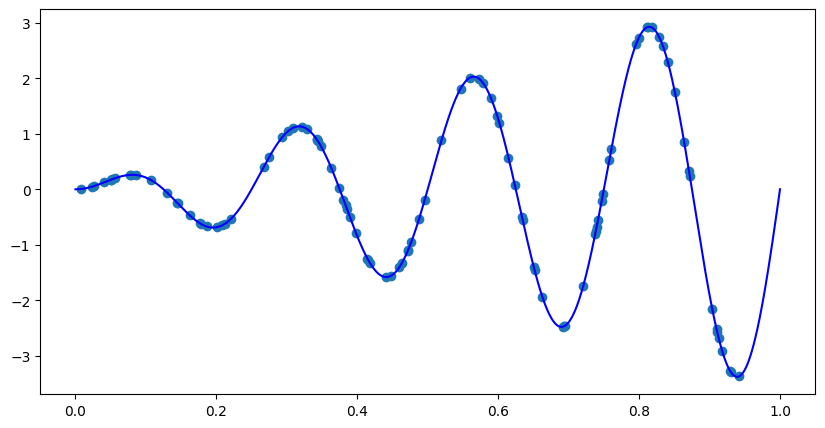

In [ ]:
# Plotting
f, ax = plt.subplots(1, figsize = (10, 5))

plt.plot(X, hf(X), 'b')
plt.scatter(X_hf, hf(X_hf))